In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats #为了显示画图时的相关系数
plt.rcParams['font.sans-serif'] = 'SimHei'
%matplotlib inline

# 分布
    -displot 概率分布图
    -kdeplot 概率密度图
    -jointplot 联合密度图
    -pairplot 多变量图
    
# 分类
    -boxplot 箱线图
    -violinplot 提琴图
    -barplot 柱形图
    -factorplot 因子图
  
# 线性
    -implot 回归图
    -heatmap 热力图

In [4]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table('CDNOW_master.txt',names = columns, sep = '\s+')

In [5]:
df.sample(5)

,user_id,order_dt,order_products,order_amount
4208,1329,19970106,1,11.77
60120,20124,19970316,2,30.35
11545,3589,19970115,6,77.22
25131,8021,19970315,1,19.77
34247,11190,19970210,5,66.51


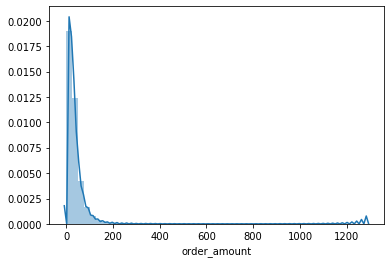

In [15]:
#概率分布图
sns.distplot(df.order_amount)

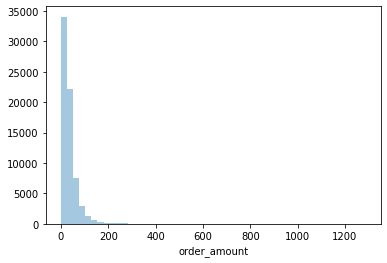

In [7]:
sns.distplot(df.order_amount,kde = False)

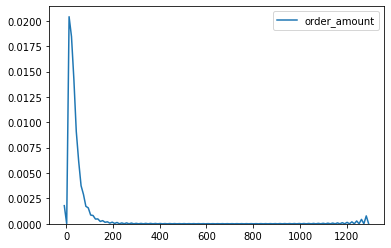

In [16]:
#概率密度图
sns.kdeplot(df.order_amount)

In [9]:
group_user = df.groupby('user_id').sum()

In [11]:
group_user.head()

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


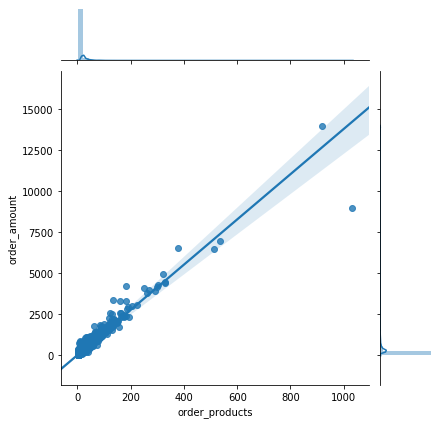

In [17]:
#联合密度图
sns.jointplot(group_user.order_products,group_user.order_amount,kind ='reg')

In [22]:
#R -recency 最近一次消费 F-  frequency 消费的频率 M  -monetary 消费金额
df['order_dt'] = pd.to_datetime(df.order_dt,format = '%Y%m%d')
rfm = df.pivot_table(index = 'user_id',
                    values=['order_products','order_amount','order_dt'],
                    aggfunc={'order_dt':'max',
                            'order_amount':'sum',
                            'order_products':'sum'})
rfm['R'] = - (rfm.order_dt - rfm.order_dt.max()) / np.timedelta64(1,'D')
rfm.rename(columns= {'order_products':'F','order_amount':'M'},inplace = True)
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


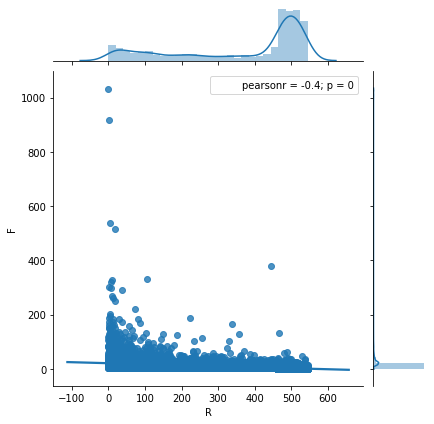

In [33]:
map = sns.jointplot(rfm.R,rfm.F,kind = 'reg')
map.annotate(stats.pearsonr)
plt.show()

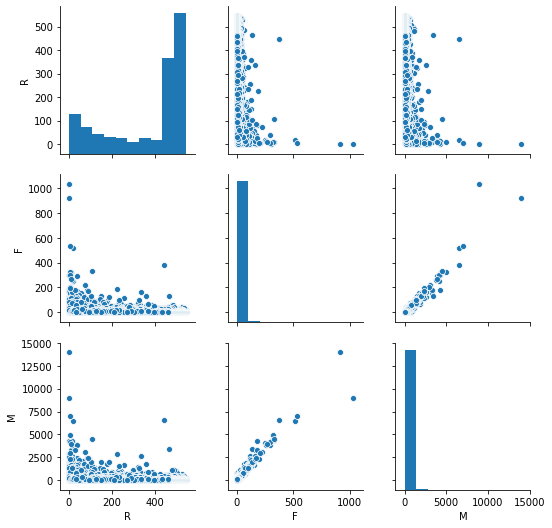

In [37]:
#多变量图,类似于散点图矩阵
sns.pairplot(rfm[['R','F','M']])
plt.show()

In [41]:
df = pd.read_csv('cy.csv',encoding='gbk')
df.head()

,城市,类型,店名,点评,人均,口味,环境,服务
0,北京,私房菜,梧桐宇私房菜,45.0,80.0,7.3,7.3,7.1
1,北京,私房菜,小东北私房菜,1.0,35.0,6.9,6.9,6.9
2,北京,私房菜,辣家私房菜,1.0,NaN,6.9,6.9,6.9
3,北京,私房菜,鸿福天原,NaN,NaN,NaN,NaN,NaN
4,北京,私房菜,虾而美(北京)餐饮管理有限公司,NaN,NaN,NaN,NaN,NaN


In [47]:
df2 = df.query("(城市 == '上海')|(城市 == '北京')")

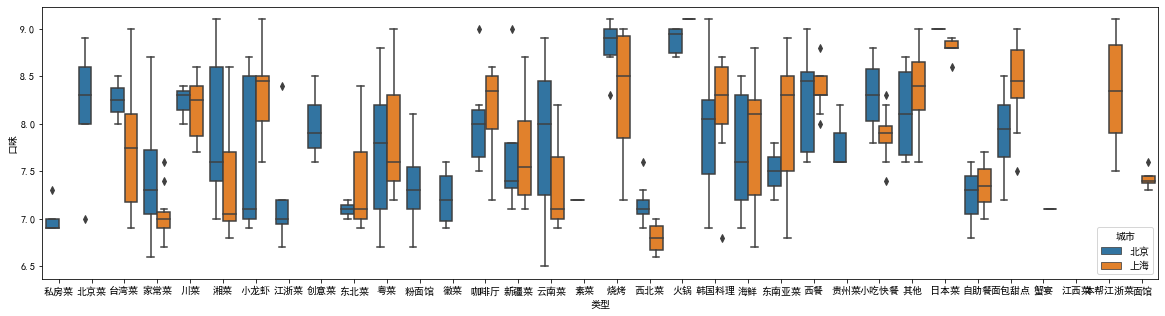

In [49]:
plt.figure(figsize=(20,5))
sns.boxplot(x='类型',y='口味',data = df2,hue ='城市')
plt.show()

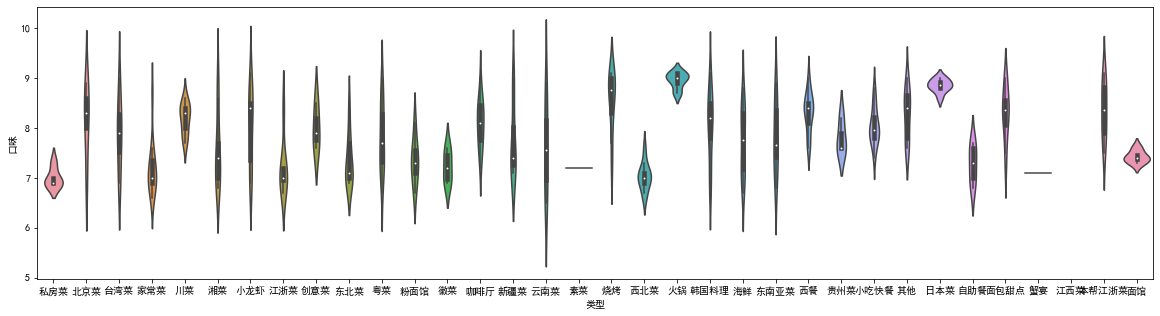

In [52]:
#提琴图表示一些菜品的分类，哪里厚，表示数据集中在哪里
plt.figure(figsize=(20,5))
sns.violinplot(x = '类型',y = '口味',data = df2)
plt.show()

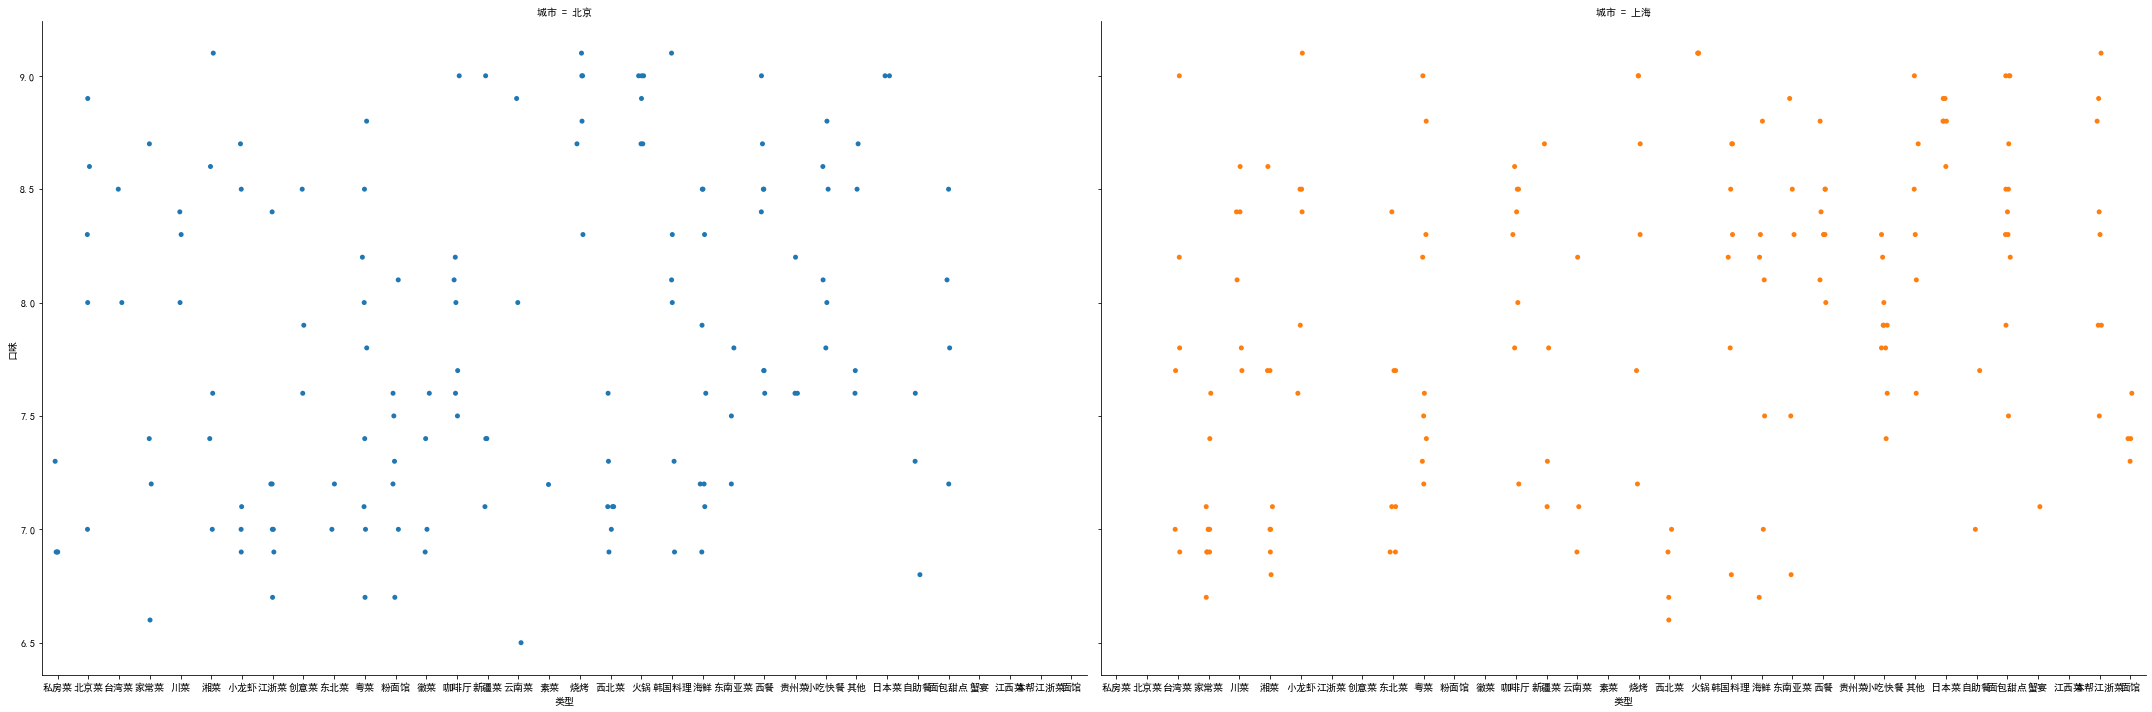

In [73]:
#因子图
sns.catplot(x= '类型',y='口味',hue = '城市',col='城市',data= df2,height = 10,aspect=1.5)
plt.show()

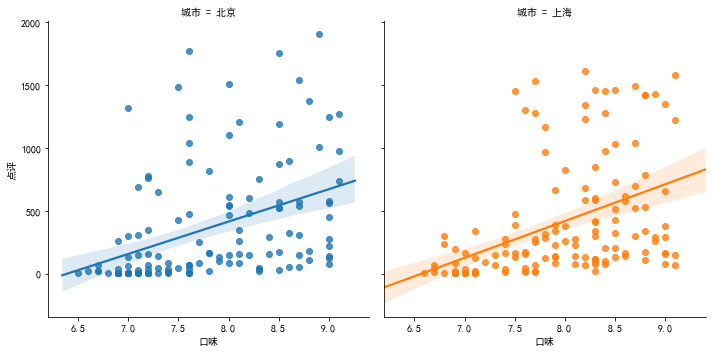

In [79]:
#回归图,但不代表这两个值之间一定会有线性关系
sns.lmplot(x='口味',y='点评',data = df2.query('点评<2000'),hue='城市',col='城市')

In [83]:
#热力图
pt = df.pivot_table(index= '城市',columns='类型',values ='口味',aggfunc='mean')

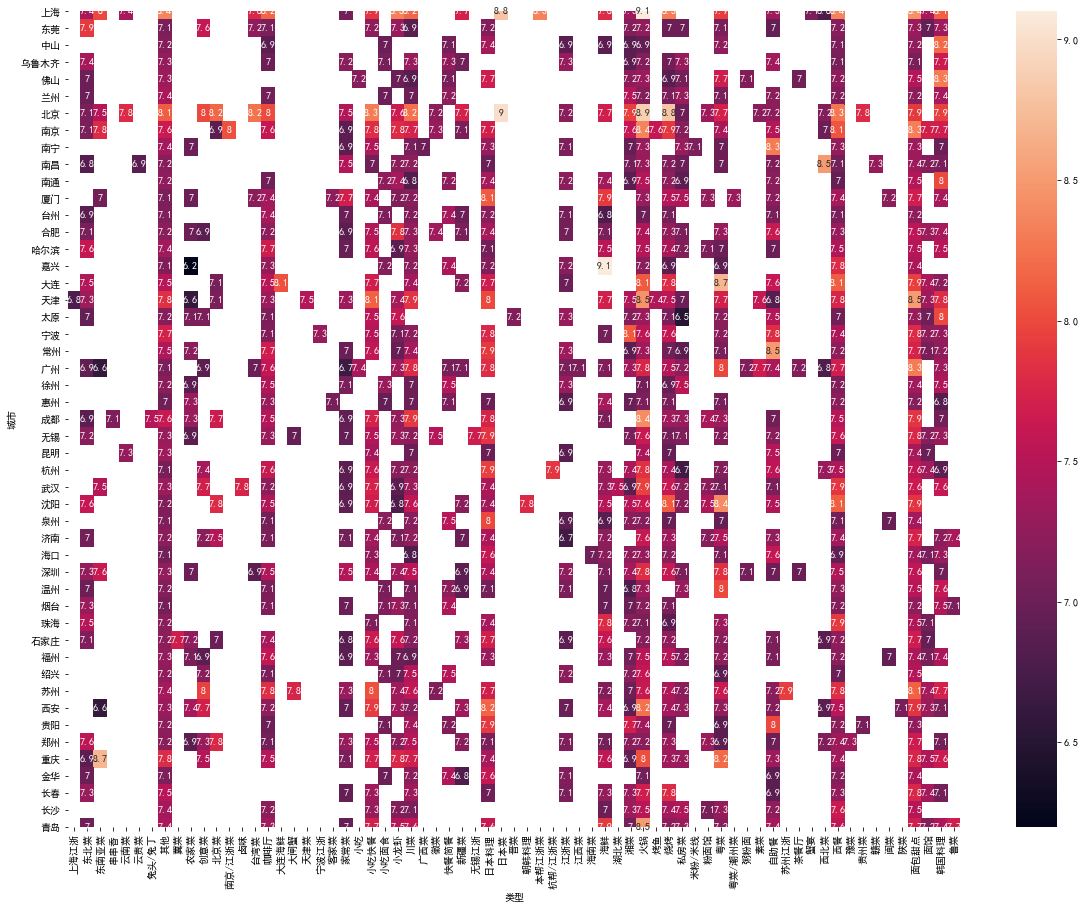

In [88]:
plt.figure(figsize=(20,15))
sns.heatmap(pt,annot=True)
plt.show()